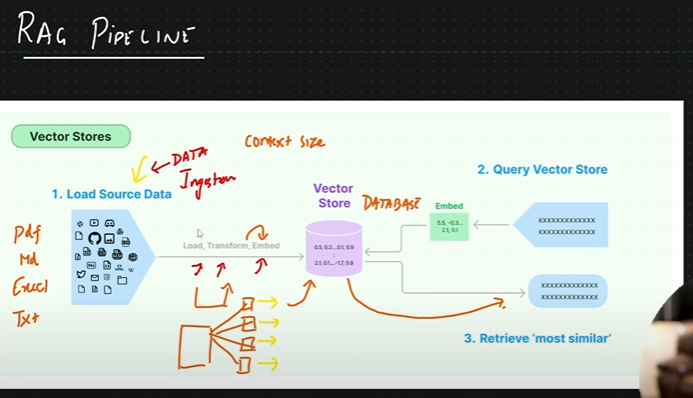

### Load the dataset

In [ ]:
## loading document using TextLoader
from langchain_community.document_loaders import TextLoader
loaders=TextLoader("speech.txt")
text_documents=loaders.load()
text_documents

[Document(metadata={'source': 'speech.txt'}, page_content='Today, I want to talk about something that surrounds us allâ€”diversity in life. Diversity is not just about different cultures, languages, or traditions. It is present in nature, in people, in thoughts, and in the way we experience the world.\n\nLook at natureâ€”no two leaves are exactly the same, no two animals behave alike, and every sunrise brings a different shade of color to the sky. This diversity is what makes life interesting, beautiful, and ever-evolving.\n\nThe same applies to us as individuals. We come from different backgrounds, have different beliefs, and possess unique talents. These differences should not divide us but unite us, making us stronger together. Imagine a world where everyone thought the same wayâ€”there would be no innovation, no progress, and no excitement.\n\nDiversity challenges us to grow, to learn from each other, and to become more understanding. It teaches us tolerance, respect, and the power

In [6]:
import os
from dotenv import load_dotenv

load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")


In [3]:
## loading document using web based loader
from langchain_community.document_loaders import WebBaseLoader
import bs4 ## for beautiful soup


## load,chunk and index the content of the html page
loader=WebBaseLoader(
    web_paths=("https://ieeexplore.ieee.org/document/10458943",),
    bs_kwargs=dict(parse_only=bs4.SoupStrainer(
        class_=("row stats-global-notification","Header","global-content-wrapper")
    )),
)

text_documents=loader.load()
text_documents


[Document(metadata={'source': 'https://ieeexplore.ieee.org/document/10458943'}, page_content='\n\n\n\n\n\n\n\n\n\n')]

#### loading the content of pdf

In [3]:
from langchain_community.document_loaders import PyPDFLoader
loader=PyPDFLoader("plant.pdf")
text_documents=loader.load()
text_documents

[Document(metadata={'producer': 'pdfTeX-1.40.24', 'creator': 'LaTeX with hyperref', 'creationdate': '2024-03-12T19:47:08+05:30', 'moddate': '2024-11-07T19:32:09-05:00', 'trapped': '/False', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022) kpathsea version 6.3.4', 'keywords': '', 'title': '', 'subject': '', 'author': '', 'source': 'plant.pdf', 'total_pages': 27, 'page': 0, 'page_label': '37443'}, page_content='Received 4 February 2024, accepted 26 February 2024, date of publication 4 March 2024, date of current version 14 March 2024.\nDigital Object Identifier 10.1 109/ACCESS.2024.3373001\nPlant Leaf Disease Detection, Classification, and\nDiagnosis Using Computer Vision and\nArtificial Intelligence: A Review\nANUJA BHARGAVA\n 1, AASHEESH SHUKLA1, OM PRAKASH GOSWAMI2,\nMOHAMMED H. ALSHARIF\n 3, PEERAPONG UTHANSAKUL\n 4, (Member, IEEE),\nAND MONTHIPPA UTHANSAKUL\n 4, (Member, IEEE)\n1Department of Electronics and Communication Engineering, GLA Universit

### trasform the loaded data : splitting the whole data into chunks

In [4]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=200)
documents=text_splitter.split_documents(text_documents)
documents[:5]


[Document(metadata={'producer': 'pdfTeX-1.40.24', 'creator': 'LaTeX with hyperref', 'creationdate': '2024-03-12T19:47:08+05:30', 'moddate': '2024-11-07T19:32:09-05:00', 'trapped': '/False', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022) kpathsea version 6.3.4', 'keywords': '', 'title': '', 'subject': '', 'author': '', 'source': 'plant.pdf', 'total_pages': 27, 'page': 0, 'page_label': '37443'}, page_content='Received 4 February 2024, accepted 26 February 2024, date of publication 4 March 2024, date of current version 14 March 2024.\nDigital Object Identifier 10.1 109/ACCESS.2024.3373001\nPlant Leaf Disease Detection, Classification, and\nDiagnosis Using Computer Vision and\nArtificial Intelligence: A Review\nANUJA BHARGAVA\n 1, AASHEESH SHUKLA1, OM PRAKASH GOSWAMI2,\nMOHAMMED H. ALSHARIF\n 3, PEERAPONG UTHANSAKUL\n 4, (Member, IEEE),\nAND MONTHIPPA UTHANSAKUL\n 4, (Member, IEEE)\n1Department of Electronics and Communication Engineering, GLA Universit

In [5]:
documents

[Document(metadata={'producer': 'pdfTeX-1.40.24', 'creator': 'LaTeX with hyperref', 'creationdate': '2024-03-12T19:47:08+05:30', 'moddate': '2024-11-07T19:32:09-05:00', 'trapped': '/False', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022) kpathsea version 6.3.4', 'keywords': '', 'title': '', 'subject': '', 'author': '', 'source': 'plant.pdf', 'total_pages': 27, 'page': 0, 'page_label': '37443'}, page_content='Received 4 February 2024, accepted 26 February 2024, date of publication 4 March 2024, date of current version 14 March 2024.\nDigital Object Identifier 10.1 109/ACCESS.2024.3373001\nPlant Leaf Disease Detection, Classification, and\nDiagnosis Using Computer Vision and\nArtificial Intelligence: A Review\nANUJA BHARGAVA\n 1, AASHEESH SHUKLA1, OM PRAKASH GOSWAMI2,\nMOHAMMED H. ALSHARIF\n 3, PEERAPONG UTHANSAKUL\n 4, (Member, IEEE),\nAND MONTHIPPA UTHANSAKUL\n 4, (Member, IEEE)\n1Department of Electronics and Communication Engineering, GLA Universit

### Vector Embedding and Vector Store

In [7]:
## for embedding : converting text into vectors
from langchain_community.embeddings import OllamaEmbeddings

## for storing vectors in vector store
from langchain_community.vectorstores import Chroma

db=Chroma.from_documents(documents[:10],OllamaEmbeddings())

C:\Users\PC-ACER\AppData\Local\Temp\ipykernel_21660\2756535702.py:7: LangChainDeprecationWarning: The class `OllamaEmbeddings` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaEmbeddings``.
  db=Chroma.from_documents(documents[:10],OllamaEmbeddings())


### Chroma vector database : it stores the documents as vector

In [12]:
query="The agriculture and food organization of the United Nation disclosed that the total number"
result=db.similarity_search(query)
result

[Document(metadata={'author': '', 'creationdate': '2024-03-12T19:47:08+05:30', 'creator': 'LaTeX with hyperref', 'keywords': '', 'moddate': '2024-11-07T19:32:09-05:00', 'page': 0, 'page_label': '37443', 'producer': 'pdfTeX-1.40.24', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022) kpathsea version 6.3.4', 'source': 'plant.pdf', 'subject': '', 'title': '', 'total_pages': 27, 'trapped': '/False'}, page_content='4School of Telecommunication Engineering, Suranaree University of Technology, Nakhon Ratchasima 30000, Thailand\nCorresponding authors: Mohammed H. Alsharif (malsharif@sejong.ac.kr) and Peerapong Uthansakul (uthansakul@sut.ac.th)\nThis work was supported in part by the Suranaree University of Technology (SUT); in part by Thailand Science Research and Innovation\n(TSRI); and in part by the National Science, Research and Innovation Fund (NSRF).\nABSTRACT Agriculture is the ultimate imperative and primary source of origin to furnish domestic income\

### Faiss Vector Database

In [13]:
from langchain_community.vectorstores import FAISS
db=FAISS.from_documents(documents[:10],OllamaEmbeddings())

In [16]:
query="Agriculture is the ultimate imperative and primary source of origin to furnish"
result=db.similarity_search(query)
result

[Document(id='12bddefe-8c33-4272-9815-328b9445f8d4', metadata={'producer': 'pdfTeX-1.40.24', 'creator': 'LaTeX with hyperref', 'creationdate': '2024-03-12T19:47:08+05:30', 'moddate': '2024-11-07T19:32:09-05:00', 'trapped': '/False', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022) kpathsea version 6.3.4', 'keywords': '', 'title': '', 'subject': '', 'author': '', 'source': 'plant.pdf', 'total_pages': 27, 'page': 0, 'page_label': '37443'}, page_content='4School of Telecommunication Engineering, Suranaree University of Technology, Nakhon Ratchasima 30000, Thailand\nCorresponding authors: Mohammed H. Alsharif (malsharif@sejong.ac.kr) and Peerapong Uthansakul (uthansakul@sut.ac.th)\nThis work was supported in part by the Suranaree University of Technology (SUT); in part by Thailand Science Research and Innovation\n(TSRI); and in part by the National Science, Research and Innovation Fund (NSRF).\nABSTRACT Agriculture is the ultimate imperative and primary s

##### till here we were searching for required query from query vector store which i snot that efficient way of searching instead we can use  LLM model along with the concept of chain and retriever to get better results

### Using Ollama for query search

In [17]:
from langchain_community.llms import Ollama
llm=Ollama(model="llama2")
llm

C:\Users\PC-ACER\AppData\Local\Temp\ipykernel_21660\2415645411.py:2: LangChainDeprecationWarning: The class `Ollama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaLLM``.
  llm=Ollama(model="llama2")


Ollama()

In [18]:
## prompt to paas in llm

from langchain_core.prompts import ChatPromptTemplate
prompt=ChatPromptTemplate.from_template(
    '''
    Answer the following question based only on the provided context.
    Think step by step before providing a detailed answer.
    i will tip you $1000 if the user finds the answer helpful.
    <context>
    {context}
    <context>
    Question: {input}
    '''
)


In [19]:
## chain introduction
## create stuff document chain

from langchain.chains.combine_documents import create_stuff_documents_chain
document_chain=create_stuff_documents_chain(llm,prompt)

#### Retriever

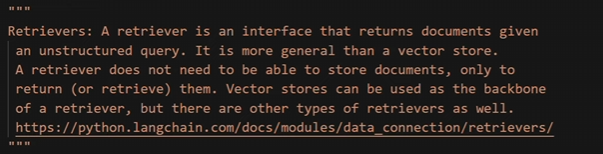

In [20]:
retriever=db.as_retriever()
retriever

VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x00000274CC7B7440>, search_kwargs={})

##### Steps involved in finally reaching to retriever chain

1. User enquiry something
2. this enquiry goes tk vector store via retriever
3. a LLM prompt is generated for the particular enquiry beforehand by chains
4. this prompt finally goes through retriever
5. after this we get final response

#### Retriever Chain : connecting chains with retriever to get results

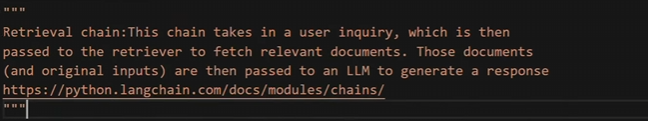

In [21]:
from langchain.chains import create_retrieval_chain
retriever_chain=create_retrieval_chain(retriever,document_chain)

In [23]:
response=retriever_chain.invoke({"input":"Agriculture is the ultimate imperative and primary source of origin to furnish"})

In [24]:
response

{'input': 'Agriculture is the ultimate imperative and primary source of origin to furnish',
 'context': [Document(id='12bddefe-8c33-4272-9815-328b9445f8d4', metadata={'producer': 'pdfTeX-1.40.24', 'creator': 'LaTeX with hyperref', 'creationdate': '2024-03-12T19:47:08+05:30', 'moddate': '2024-11-07T19:32:09-05:00', 'trapped': '/False', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022) kpathsea version 6.3.4', 'keywords': '', 'title': '', 'subject': '', 'author': '', 'source': 'plant.pdf', 'total_pages': 27, 'page': 0, 'page_label': '37443'}, page_content='4School of Telecommunication Engineering, Suranaree University of Technology, Nakhon Ratchasima 30000, Thailand\nCorresponding authors: Mohammed H. Alsharif (malsharif@sejong.ac.kr) and Peerapong Uthansakul (uthansakul@sut.ac.th)\nThis work was supported in part by the Suranaree University of Technology (SUT); in part by Thailand Science Research and Innovation\n(TSRI); and in part by the National Scie

In [25]:
response['answer']

'The answer to the question "Agriculture is the ultimate imperative and primary source of origin to furnish domestic income for multifarious countries." can be found in the provided context. The context explains that agriculture is crucial for providing food and income for many countries, as it is the ultimate source of origin for domestic income.\n\nIn the context, the authors mention that "Agriculture is the ultimate imperative and primary source of origin to furnish domestic income for multifarious countries." This statement highlights the importance of agriculture in providing food and income for many countries around the world. It emphasizes that agriculture is the primary source of income for these countries, making it a vital aspect of their economies.'

##### here we can see how llm model performs better the just similarity search in vector store